# Climate data
This code loads the `climetlab` package and sets the source and dataset to retrieve data from the Climate Data Store (CDS) for the ERA5 reanalysis dataset. The API configuration was performed following `https://cds.climate.copernicus.eu/api-how-to`.

`climetlab.load_source` ->  The `product_type` is set to `"reanalysis"`, and the `variable` is set to `"2m_temperature"` to retrieve temperature data at 2 meters above ground level (Kelvin), or `"total_precipitation"` represents the total precipitation rate and its units are meters per second (m s-1)
  The `year` is set to `2022`, and the `month` is set to a list containing `9`, `10`, and `11` to retrieve data for September, October, and November of 2022.
   The `day` and `time` are set to `"01"` and `"12:00"`, respectively, to retrieve data for the first day of each month at noon.
    The `area` parameter is set to `[38.72, -9.14, 38.72, -9.14]` to specify the coordinates for Lisbon.
    The data is then loaded into an xarray object using the `to_xarray()` method and printed to the screen.
    Is there anything else you would like to know?

# TODOS
* Add labels to plot
* How to integrate with model - only 1 value for the entire city, per hour

In [156]:
import climetlab as cml
import xarray as xr

In [157]:
hours_param = [f"0{i}:00" for i in range(0, 10)] + [f"{i}:00" for i in range(10, 24)]

In [158]:
# Set the source and dataset
source = cml.load_source("cds", "reanalysis-era5-single-levels",
                         product_type="reanalysis",
                         variable="2m_temperature",
                         year=2022,
                         month=[10, 11, 12],
                         day=list(range(1,31)),
                         time=hours_param,
                         area=[38.72, -9.14, 38.72, -9.14])

# Load the data
data_temp = source.to_xarray()

2023-04-12 00:07:28,312 INFO Welcome to the CDS
2023-04-12 00:07:28,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-04-12 00:07:28,412 INFO Request is queued
2023-04-12 00:07:29,483 INFO Request is running
2023-04-12 00:09:22,458 INFO Request is completed
2023-04-12 00:09:22,458 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1681254448.2791424-19007-4-7b30f26d-2162-49f0-9b39-083837dee344.grib to C:\Users\DUARTE~1.PER\AppData\Local\Temp\climetlab-duarte.pereira\cds-retriever-37a4825700ebc3d9b3c61c0b11fc1314ea25dc641267be7de4613a0a491735d0.cache.tmp (253.1K)
2023-04-12 00:09:23,182 INFO Download rate 349.5K/s


In [159]:
print(data_temp)

<xarray.Dataset>
Dimensions:     (number: 1, time: 2160, step: 1, surface: 1, latitude: 1,
                 longitude: 1)
Coordinates:
  * number      (number) int32 0
  * time        (time) datetime64[ns] 2022-10-01 ... 2022-12-30T23:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 38.72
  * longitude   (longitude) float64 -9.14
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-04-12T00:09 GRIB to CDM+CF via cfgrib-0.9.1...


In [160]:
# total_precipitation represents the total precipitation rate and its units are meters per second (m s-1)
source = cml.load_source("cds", "reanalysis-era5-single-levels",
                         product_type="reanalysis",
                         variable="total_precipitation",
                         year=2022,
                         month=[10, 11, 12],
                         day=list(range(1,31)),
                         time=hours_param,
                         area=[38.72, -9.14, 38.72, -9.14])

# Load the data
data_precip = source.to_xarray()

2023-04-12 00:09:30,775 INFO Welcome to the CDS
2023-04-12 00:09:30,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-04-12 00:09:30,946 INFO Request is queued
2023-04-12 00:09:32,037 INFO Request is running
2023-04-12 00:10:20,753 INFO Request is completed
2023-04-12 00:10:20,753 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data7/adaptor.mars.internal-1681254570.89009-9613-5-74d1ac89-153b-4c78-a0d1-6434540a7ddf.grib to C:\Users\DUARTE~1.PER\AppData\Local\Temp\climetlab-duarte.pereira\cds-retriever-1bcf702bc96cc3a304f97bff5b71c8d8be82d576a2d4fabfec18de95f2d6461c.cache.tmp (253.1K)
2023-04-12 00:10:22,327 INFO Download rate 160.8K/s


In [161]:
print(data_precip)

<xarray.Dataset>
Dimensions:     (number: 1, time: 182, step: 12, surface: 1, latitude: 1,
                 longitude: 1)
Coordinates:
  * number      (number) int32 0
  * time        (time) datetime64[ns] 2022-09-30T18:00:00 ... 2022-12-30T18:0...
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 11:00:00 12:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 38.72
  * longitude   (longitude) float64 -9.14
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    tp          (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-04-12T00:10 GRIB to CDM+CF via cfgrib-0.9.1...


In [206]:
# Convert the merged xarray object to a pandas DataFrame
df = data_temp.to_dataframe().reset_index()
df['tp'] =  data_precip.to_dataframe().reset_index()['tp']
# Set the time column as the index
df = df.set_index("time")

In [205]:
df

,number,step,surface,latitude,longitude,valid_time,t2m,tp
time,,,,,,,,
2022-10-01 00:00:00,0,0 days,0.0,38.72,-9.14,2022-10-01 00:00:00,287.739258,NaN
2022-10-01 01:00:00,0,0 days,0.0,38.72,-9.14,2022-10-01 01:00:00,287.532715,NaN
2022-10-01 02:00:00,0,0 days,0.0,38.72,-9.14,2022-10-01 02:00:00,287.250000,NaN
2022-10-01 03:00:00,0,0 days,0.0,38.72,-9.14,2022-10-01 03:00:00,287.042236,NaN
2022-10-01 04:00:00,0,0 days,0.0,38.72,-9.14,2022-10-01 04:00:00,286.948730,NaN
...,...,...,...,...,...,...,...,...
2022-12-30 19:00:00,0,0 days,0.0,38.72,-9.14,2022-12-30 19:00:00,289.267334,0.0
2022-12-30 20:00:00,0,0 days,0.0,38.72,-9.14,2022-12-30 20:00:00,289.145508,0.0
2022-12-30 21:00:00,0,0 days,0.0,38.72,-9.14,2022-12-30 21:00:00,288.899902,0.0


In [213]:
np.sort(df.tp.unique())[-100]

0.00087974104

In [208]:
import numpy as np
import matplotlib.pyplot as plt

In [209]:
df_resampled = df.resample("5D").mean()
# Format the timestamps as strings with only the day and month
df_resampled.index = df_resampled.index.strftime("%d-%m")

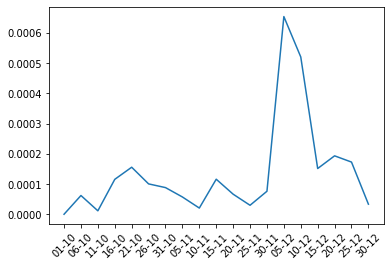

In [222]:
# Visualize flood in december
plt.plot(df_resampled.index, df_resampled['tp'])
plt.xticks(rotation=45)
plt.show()

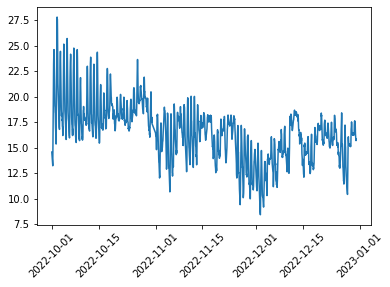

In [225]:
plt.plot(df.index, df['t2m']-273.15)
plt.xticks(rotation=45)
plt.show()

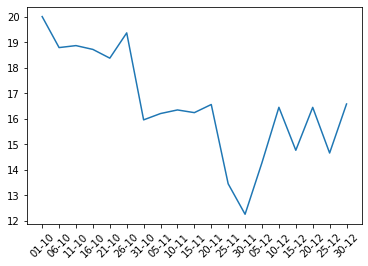

In [226]:
plt.plot(df_resampled.index, df_resampled['t2m']-273.15)
plt.xticks(rotation=45)
plt.show()